<a href="https://colab.research.google.com/github/ibad321/Diabetes-Prediction-Using-Artificial-Neural-Networks/blob/main/Diabetes_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Pakistani_Diabetes_Dataset.csv')
df.head()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,60.0,1,0,76.0,29.90,41.0,130,90,0,8.90,278,0,30,1,0,5.0,0,60,1
1,57.0,1,1,64.0,24.30,39.0,120,80,1,8.50,165,0,20,1,1,20.0,0,42,1
2,58.0,0,0,73.0,25.20,34.0,140,90,0,5.65,130,1,20,0,0,0.0,0,54,0
3,27.0,0,1,60.0,22.01,30.0,110,70,0,5.00,95,0,15,0,0,0.0,0,57,0
4,56.0,1,0,70.0,25.80,43.0,125,90,0,8.30,139,1,40,1,0,5.0,1,53,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      912 non-null    float64
 1   Gender   912 non-null    int64  
 2   Rgn      912 non-null    int64  
 3   wt       912 non-null    float64
 4   BMI      912 non-null    float64
 5   wst      912 non-null    float64
 6   sys      912 non-null    int64  
 7   dia      912 non-null    int64  
 8   his      912 non-null    int64  
 9   A1c      912 non-null    float64
 10  B.S.R    912 non-null    int64  
 11  vision   912 non-null    int64  
 12  Exr      912 non-null    int64  
 13  dipsia   912 non-null    int64  
 14  uria     912 non-null    int64  
 15  Dur      912 non-null    float64
 16  neph     912 non-null    int64  
 17  HDL      912 non-null    int64  
 18  Outcome  912 non-null    int64  
dtypes: float64(6), int64(13)
memory usage: 135.5 KB


In [ ]:
df.duplicated().sum()

2

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,36.304945,0.552747,0.289011,69.369451,25.632611,35.470879,129.652747,82.352747,0.586813,6.863297,165.587912,0.489011,14.423077,0.380220,0.328571,2.117582,0.171429,45.939560,0.534066
std,13.513210,0.497483,0.453552,12.179145,8.255834,3.893985,19.768803,11.834380,0.492677,2.197677,84.779793,0.500154,15.617897,0.485708,0.469952,2.966497,0.377090,6.799799,0.499112
min,12.000000,0.000000,0.000000,30.000000,2.840000,24.000000,90.000000,20.000000,0.000000,0.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,22.250000,0.000000,0.000000,60.000000,22.512500,32.500000,120.000000,73.250000,0.000000,5.000000,96.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,36.000000,1.000000,0.000000,69.000000,25.260000,35.000000,126.000000,80.000000,1.000000,6.100000,131.000000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,46.000000,1.000000
75%,48.000000,1.000000,1.000000,77.000000,28.300000,38.000000,138.000000,90.000000,1.000000,8.500000,217.750000,1.000000,25.000000,1.000000,1.000000,3.500000,0.000000,51.000000,1.000000
max,70.000000,1.000000,1.000000,110.000000,233.790000,67.000000,245.000000,115.000000,1.000000,14.000000,464.000000,1.000000,120.000000,1.000000,1.000000,25.000000,1.000000,62.000000,1.000000


In [ ]:
df.corr()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
Age,1.000000,0.214637,0.042504,0.208377,0.185692,0.537942,0.341709,0.254652,0.095453,0.640859,0.584107,0.119278,-0.042573,0.480036,0.462841,0.564584,0.326410,-0.367490,0.767642
Gender,0.214637,1.000000,0.007935,-0.313321,0.130369,0.054164,0.051083,0.110726,0.106973,0.257896,0.222734,0.017807,-0.036786,0.221949,0.186942,0.211971,0.115945,-0.136457,0.320617
Rgn,0.042504,0.007935,1.000000,0.006639,0.005827,0.028646,-0.002659,0.065838,0.052521,0.038235,0.046216,-0.027206,0.007258,0.005005,-0.012461,0.057093,-0.000551,-0.001464,0.002627
wt,0.208377,-0.313321,0.006639,1.000000,0.306226,0.553518,0.095459,0.143015,-0.002234,0.147896,0.123249,0.015838,-0.030402,0.150984,0.103721,0.106326,0.045001,-0.117046,0.175211
BMI,0.185692,0.130369,0.005827,0.306226,1.000000,0.302978,0.080428,0.094561,0.002151,0.173053,0.138655,0.008002,-0.021128,0.165118,0.110327,0.137761,0.072484,-0.057640,0.204474
wst,0.537942,0.054164,0.028646,0.553518,0.302978,1.000000,0.245538,0.261809,0.066352,0.455621,0.424404,0.103718,-0.042813,0.387515,0.318053,0.405531,0.228635,-0.277918,0.554065
sys,0.341709,0.051083,-0.002659,0.095459,0.080428,0.245538,1.000000,0.425527,0.074145,0.288678,0.304979,0.053354,0.025593,0.254025,0.222006,0.300495,0.158077,-0.166821,0.368689
dia,0.254652,0.110726,0.065838,0.143015,0.094561,0.261809,0.425527,1.000000,0.073894,0.239460,0.227743,-0.001668,-0.006963,0.207264,0.176942,0.164931,0.072469,-0.097344,0.278733
his,0.095453,0.106973,0.052521,-0.002234,0.002151,0.066352,0.074145,0.073894,1.000000,0.117952,0.125686,0.088701,-0.043881,0.045801,0.073850,0.143739,0.020471,-0.058690,0.133358
A1c,0.640859,0.257896,0.038235,0.147896,0.173053,0.455621,0.288678,0.239460,0.117952,1.000000,0.792712,0.065979,-0.077344,0.526377,0.441698,0.560683,0.378511,-0.363887,0.811424


In [ ]:
df.corr()['Outcome']

Age        0.767642
Gender     0.320617
Rgn        0.002627
wt         0.175211
BMI        0.204474
wst        0.554065
sys        0.368689
dia        0.278733
his        0.133358
A1c        0.811424
B.S.R      0.743559
vision     0.138115
Exr       -0.071216
dipsia     0.609057
uria       0.540838
Dur        0.667114
neph       0.407320
HDL       -0.436180
Outcome    1.000000
Name: Outcome, dtype: float64

In [ ]:
df.drop(columns=['Rgn ','vision', 'Exr'], inplace=True)


In [ ]:

print(df.columns)


Index(['Age', 'Gender', 'wt', 'BMI', 'wst', 'sys', 'dia', 'his', 'A1c',
       'B.S.R', 'dipsia', 'uria', 'Dur', 'neph', 'HDL', 'Outcome'],
      dtype='object')


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,Age,Gender,wt,BMI,wst,sys,dia,his,A1c,B.S.R,dipsia,uria,Dur,neph,HDL
0,60.0,1,76.0,29.90,41.0,130,90,0,8.90,278,1,0,5.0,0,60
1,57.0,1,64.0,24.30,39.0,120,80,1,8.50,165,1,1,20.0,0,42
2,58.0,0,73.0,25.20,34.0,140,90,0,5.65,130,0,0,0.0,0,54
3,27.0,0,60.0,22.01,30.0,110,70,0,5.00,95,0,0,0.0,0,57
4,56.0,1,70.0,25.80,43.0,125,90,0,8.30,139,1,0,5.0,1,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,22.0,0,54.0,17.08,40.0,143,85,1,5.00,165,0,0,0.0,0,54
908,32.0,0,52.0,18.50,28.0,138,95,1,4.70,87,0,0,0.0,0,54
909,22.0,0,78.0,26.14,32.0,183,88,1,4.50,100,1,0,0.0,0,40
910,18.0,1,53.0,20.05,33.0,195,93,1,4.70,74,0,0,0.0,0,46


In [ ]:
y

0      1
1      1
2      0
3      0
4      1
      ..
907    0
908    0
909    1
910    0
911    0
Name: Outcome, Length: 910, dtype: int64

In [ ]:
df.shape

(910, 16)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(728, 15)

In [ ]:
y_train.shape

(728,)

In [ ]:
X_test.shape

(182, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [ ]:
x_train_sc

array([[ 0.80129239,  0.89304584, -0.89889533, ...,  0.94479954,
        -0.45968954,  0.1535995 ],
       [-1.20523073,  0.89304584, -1.14192121, ..., -0.70187047,
        -0.45968954,  1.03062252],
       [ 1.5444491 ,  0.89304584, -0.41284356, ..., -0.04320247,
        -0.45968954,  0.007429  ],
       ...,
       [ 0.65266105,  0.89304584, -0.16981768, ...,  0.12146453,
         2.17538122, -0.72342352],
       [ 1.0242394 ,  0.89304584,  0.23522547, ...,  1.93280154,
         2.17538122, -2.33129905],
       [ 1.39581776,  0.89304584,  1.61237215, ..., -0.20786947,
         2.17538122, -2.03895805]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2

In [ ]:
model=Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01),input_dim=15))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                512       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 545 (2.13 KB)
Trainable params: 545 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test),batch_size=32)

Epoch 1/100
23/23 [==============================] - 1s 16ms/step - loss: 0.6845 - accuracy: 0.7926 - val_loss: 0.5666 - val_accuracy: 0.8901
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5536 - accuracy: 0.8723 - val_loss: 0.4720 - val_accuracy: 0.9341
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4997 - accuracy: 0.9093 - val_loss: 0.4119 - val_accuracy: 0.9451
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.9519 - val_loss: 0.3712 - val_accuracy: 0.9560
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.9382 - val_loss: 0.3415 - val_accuracy: 0.9560
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3405 - accuracy: 0.9629 - val_loss: 0.3178 - val_accuracy: 0.9560
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.9602 - val_loss: 0.2984 - val_accuracy: 0.9615
Epoch 8/100


6/6 [==============================] - 0s 4ms/step


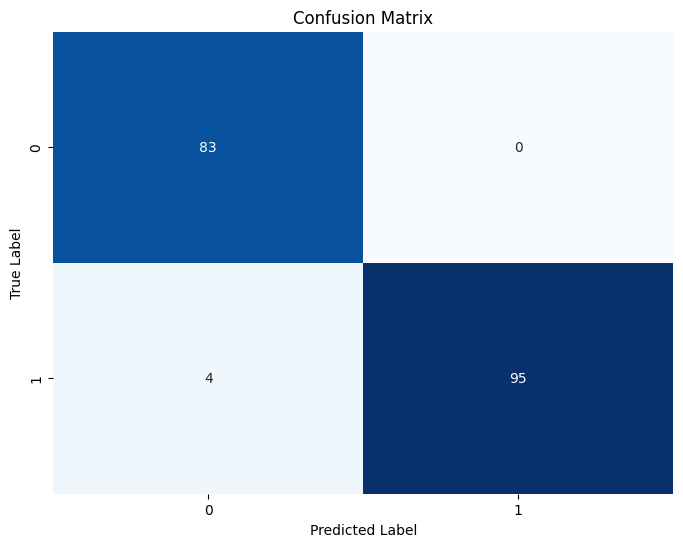

Accuracy: 0.978021978021978


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Get the predicted labels for the test data
y_pred = model.predict(X_test_sc)

# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


In [ ]:
new_data = np.array([[5, 166, 72, 19, 175, 25.8, 0.587, 51, 0, 0.14, 2.0, 33.6, 0.627, 50,20]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
if prediction[0] > 0.5:
  print("The person is predicted to have diabetes")
else:
  print("The person is predicted to not have diabetes")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
The person is predicted to have diabetes
